In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# i. Generate Samples
N = 150
mean = 0.0
standard_deviation = 10.0
x = np.zeros(N)
for i in range(N):
    x[i] = i

sample_points = np.random.normal(mean, standard_deviation, N)

In [3]:
# ii. Construct a Design Matrix
num_features = 3
rows = N
cols = num_features
features = [1,1,2]
X = np.zeros((N, num_features))

#Design Matrix
for i in range(N):
    X[i][0] = 1

for i in range(1,len(features)):
    for j in range(N):
        X[j][i] = pow(sample_points[j],features[i])

In [15]:
#iii. Sample True values using Uniform Distribution
low = mean
high = standard_deviation
true_params = np.random.uniform(low, high, N)

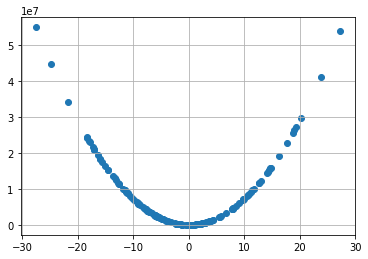

In [16]:
# iv... Use the design matrix and the true_values to create the y-values
true_params = true_params.transpose()
y_values = true_params.dot(X)

y = np.zeros(N)

for i in range(N):
    y[i] = y_values[0] + y_values[1] * sample_points[i] + y_values[2] * pow(sample_points[i],2) 

plt.scatter(sample_points, y)
plt.grid(True)
plt.show()


# Part (b)

## Use the Moore - Penrose pseudo - inverse to calculate the closed form solution

In [17]:
# i...
theta = (np.linalg.inv(X.transpose().dot(X))).dot(X.transpose()).dot(y)
print(theta)

[  697.90939996  -544.93730893 72549.45326205]


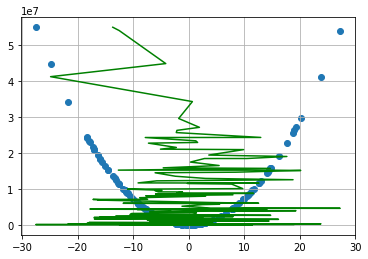

[3.88130073e+03 8.69015536e+03 1.28870212e+04 2.12923697e+04
 2.25499252e+04 2.36648318e+04 3.43544966e+04 4.20992119e+04
 9.01574909e+04 1.01152247e+05 1.04668217e+05 1.06853284e+05
 1.22003951e+05 1.40345562e+05 1.45308629e+05 1.91118806e+05
 1.92772900e+05 2.33287541e+05 2.58633490e+05 2.69164735e+05
 2.75392442e+05 3.16801627e+05 3.19008055e+05 3.21591618e+05
 3.28696110e+05 3.33077425e+05 3.55325476e+05 3.59572115e+05
 3.68241408e+05 3.84850840e+05 4.13338722e+05 4.27014726e+05
 4.49514177e+05 4.77062184e+05 5.90491887e+05 6.58772837e+05
 6.68077551e+05 6.69489649e+05 6.79478054e+05 7.09002803e+05
 8.70615885e+05 9.59872398e+05 1.04262336e+06 1.08670584e+06
 1.13797244e+06 1.23189927e+06 1.32424831e+06 1.38594957e+06
 1.41881353e+06 1.52179150e+06 1.55425596e+06 1.67127159e+06
 1.69694664e+06 1.86986994e+06 1.92620902e+06 2.06756500e+06
 2.17441375e+06 2.19086171e+06 2.26219332e+06 2.31424016e+06
 2.39707809e+06 2.48058958e+06 2.57509291e+06 2.57547666e+06
 2.61594501e+06 2.646074

In [20]:
# ii...Learned parameters to the true params
new_y = np.zeros(N)

for i in range(N):
    new_y[i] = theta[0] + theta[1] * sample_points[i] + theta[2] * pow(sample_points[i],2)


plt.scatter(sample_points, y)
plt.plot(sample_points,np.sort(new_y),'g')
plt.grid(True)
plt.show()


# Get the Error 

SSE = 0.0
for i in range(N):
    SSE += 0.5 * (pow(new_y[i] - y[i],2))
    
print(np.sort(new_y))